In [1]:
#pip install ipynb

In [2]:
#import necessary pkgs
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
#from cnn import Net    #to use the py script
from ipynb.fs.full.cnn import Net

In [3]:
#standardize image size (dimensions) : make them 50x50 pixels
img_size = 50

In [4]:
#read training data
training_data = np.load("melanoma_training_data.npy", allow_pickle=True)

In [5]:
# for row in training_data:
#     print(row[0])
#     print(row[1])
#     print()
#     print()
#     input() #to only print 1 row

In [6]:
#separate dep feature and ind feature into different tensor objects
train_X = torch.Tensor([item[0] for item in training_data])
train_X = train_X/255   #normalize

# for row in train_X:
#     print(row)
#     print()
#     input()

/var/folders/fq/09kvyhs13yv_g91hj_p6y7m00000gn/T/ipykernel_77718/364081968.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  train_X = torch.Tensor([item[0] for item in training_data])


In [7]:
#separate dep feature and ind feature into different tensor objects
train_y = torch.Tensor([item[1] for item in training_data])

In [8]:
net = Net()

In [9]:
#define optimizers
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
#define loss function
loss_function = nn.MSELoss()

In [11]:
#define batch size
batch_size = 100    #number of images passing through at once, reduce if encountering RAM error

In [12]:
#define epochs
epochs = 100     #increase for real-life

In [13]:
loss_history = []

In [14]:
for epoch in range(epochs):
    
    for i in range(0, len(train_X), batch_size):
        
        print(f"EPOCH {epoch+1}, fraction complete: {i/len(train_X)}")
        
        batch_X = train_X[i: i+batch_size].view(-1, 1, img_size, img_size)
        batch_y = train_y[i: i+batch_size]
        
        optimizer.zero_grad()   #resetting gradients per batch size
        
        outputs = net(batch_X)
        
        #real label: [0,1]
        #model guess: [0.34, 0.66]
        
        loss = loss_function(outputs, batch_y)
        loss_history.append(float(loss))
        print(f"Loss: {loss}")
        
        loss.backward() #backprop
        
        optimizer.step()    #optimizer update model params based on the gradients
        

EPOCH 1, fraction complete: 0.0
Loss: 0.250053346157074
EPOCH 1, fraction complete: 0.010857763300760043


/Users/tyronemariano/Desktop/melanoma_mal-vs-ben/cnn.ipynb:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  "        #print(f\"shape after conv1: {x.shape}\")\n",


Loss: 0.2669070363044739
EPOCH 1, fraction complete: 0.021715526601520086
Loss: 0.24875329434871674
EPOCH 1, fraction complete: 0.03257328990228013
Loss: 0.2480347454547882
EPOCH 1, fraction complete: 0.04343105320304017
Loss: 0.2471870481967926
EPOCH 1, fraction complete: 0.05428881650380022
Loss: 0.24722141027450562
EPOCH 1, fraction complete: 0.06514657980456026
Loss: 0.24955230951309204
EPOCH 1, fraction complete: 0.07600434310532031
Loss: 0.23932577669620514
EPOCH 1, fraction complete: 0.08686210640608034
Loss: 0.23403045535087585
EPOCH 1, fraction complete: 0.09771986970684039
Loss: 0.23788955807685852
EPOCH 1, fraction complete: 0.10857763300760044
Loss: 0.21739012002944946
EPOCH 1, fraction complete: 0.11943539630836048
Loss: 0.21599288284778595
EPOCH 1, fraction complete: 0.13029315960912052
Loss: 0.1988336741924286
EPOCH 1, fraction complete: 0.14115092290988057
Loss: 0.20209628343582153
EPOCH 1, fraction complete: 0.15200868621064062
Loss: 0.1831333488225937
EPOCH 1, fractio

In [15]:
len(loss_history)

9300

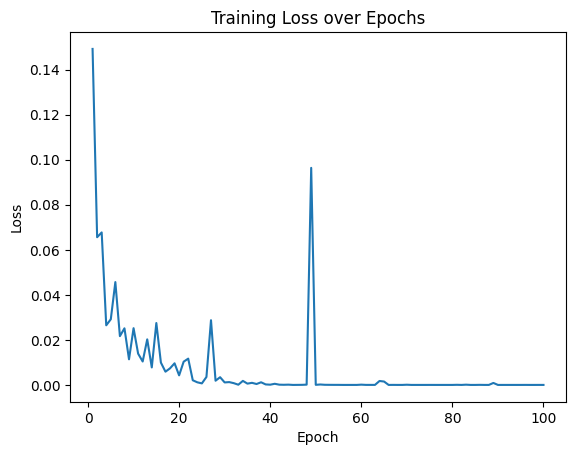

In [16]:
# Use every 92nd value
sampled_loss_history = [loss_history[i] for i in range(92, len(loss_history), 93)]  

epochs = range(1, len(sampled_loss_history) + 1)

# Plot the line graph
plt.plot(epochs, sampled_loss_history)

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')

# Show the plot
plt.show()

In [17]:
torch.save(net.state_dict(), "saved_model.pth")